In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Bring on the penguins!
# penguins = pd.read_csv('data/penguins.csv')
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We have 3 species of penguins living across 3 different islands. There are measurements of bill length, bill depth, flipper length, and body mass. We also have categorcial variable for each penguin's sex giving us a total of 7 features.

Here's a plot that tries to show too much at once. But you can ignore the marker shapes and sizes. The bill and flipper length alone ($x$ and $y$ axes) seem too already provide a fair amount of information about the species (color).

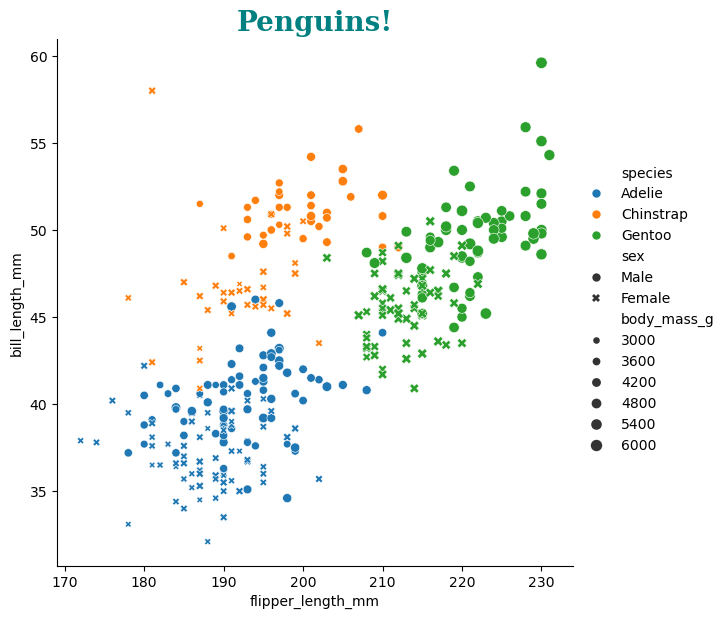

In [6]:
# Plot penguins with too much info
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            hue='species', style='sex', size='body_mass_g', height=6);
plt.title('Penguins!', fontdict={'color': 'teal', 'size': 20, 'weight': 'bold', 'family': 'serif'});

You may have noticed some pesky `NaN`s when we displayed the beginning of the DataFrame.\
We should investigate further.

<div class='exercise'> <b>Missingness</div>


In [7]:
# How many missing values in each column?
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Let's take a look at them first all the rows with missing data.

In [8]:
# Rows with missingness
penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Yikes! There are two observations where all predictors except `species` and `island` are missing.\
These rows won't be of any use to us. We see that dropping rows missing `body_mass_g` will take care of most our missingness.

In [9]:
# Drop the bad rows identified above
penguins = penguins.dropna(subset=['body_mass_g'])
# Check state of missingness after dropping
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

It looks like there are 9 rows where `sex` is missing. We can try to **impute** these values.\
But first, take a look at our DataFrame again.

In [10]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Notice how the indices go from `2` to `4`. What happened to `3`?\
It was one of the rows we dropped! This issue with the indices can cause headaches later on (think `loc`/`iloc` distinction).
But we can make things good as new using the `reset_index` method. Just be sure to set `drop=True`, otherwise the old indices will be added to the DataFrame as a new column.

In [11]:
# Reset index
penguins = penguins.reset_index(drop=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Much better!\
The the missing `sex` values will be handled later when we encode the categorical and binary predictors.

In [12]:
response = 'species'
X = penguins.drop(response, axis=1)
y = penguins[response]

<div class='exercise'> <b>Preprocessing</div>

We can't just throw this DataFrame at a neural network as it is. There's some work we need to do first.

**Separate predictors from response variable**

In [13]:
# Isolate response from predictors
response = 'species'
X = penguins.drop(response, axis=1)
y = penguins[response]

**Encode Categorical Predictor Variables**

In [14]:
# Check the predictor data types
X.dtypes

island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Both `island` and `sex` are categotical. We can use `pd.get_dummies` to one-hot-encode them (don't forget to `drop_first`!).

In [15]:
# Identify the categorical columns
cat_cols = ['island', 'sex']

In [16]:
# one-hot encode the categorical columns
# Because the sexs are roughly equally represented, we simply have the NAs default to sex_Male == False
# But include an indicator variable
X_design = pd.get_dummies(X, columns=cat_cols, drop_first=True, dummy_na = True)
X_design.head(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,island_nan,sex_Male,sex_nan
0,39.1,18.7,181.0,3750.0,False,True,False,True,False


In [17]:
X_design.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
island_Dream         0
island_Torgersen     0
island_nan           0
sex_Male             0
sex_nan              0
dtype: int64

From the remaining columns we can infer that the 'reference' values for our categorical variables are `island = 'Biscoe'`, and `sex = 'Female'`.

In [28]:
# Save results of preprocessing
penguin_proc = pd.concat([X_design, y], axis=1).reset_index(drop=True)
penguin_proc.to_csv("data/penguins_proc.csv", index=False)

**Feature Scaling**

We should take a closer look at the range of values our predictors take on.

In [24]:
#  Summary stats of predictors
X_design.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Our features are not on the same scale. Just compare the min/max of `bill_depth_mm` and `body_mass_g` for example.\
This can slow down neural network training for reasons we'll see in an upcoming lecture.

Let's make use of `sklearn`'s `StandardScaler` to standardize the data, centering each predictor at 0 and setting their standard deviations to 1.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Remember the column names for later; we'll lose them when we scale
X_cols = X_design.columns
# Saving the scaler object in a variable allows us to reverse the transformation later
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_design)

In [21]:
# The scaler was passed a pandas DataFrame but returns a numpy array
type(X_scaled), X_scaled.shape

(numpy.ndarray, (342, 9))

In [22]:
# We can always add the column names back later if we need to
pd.DataFrame(X_scaled, columns=X_cols).head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,island_nan,sex_Male,sex_nan
0,-0.884499,0.785449,-1.418347,-0.564142,-0.754193,2.388699,0.0,1.017700,-0.164399
1,-0.811126,0.126188,-1.062250,-0.501703,-0.754193,2.388699,0.0,-0.982607,-0.164399
2,-0.664380,0.430462,-0.421277,-1.188532,-0.754193,2.388699,0.0,-0.982607,-0.164399
